## TITANIC SURVIVAL PREDICTION
Using the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data.The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket,class, fare, cabin, and whether or not they survived.

**Model: Decision Tree(82%)**

**Name: Ankush Talukdar**

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### Datasets

In [2]:
# Loading Datasets
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [3]:
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


### Data Overview/Details

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Cleaning Data

In [9]:
#Check for null/missing values in columns
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

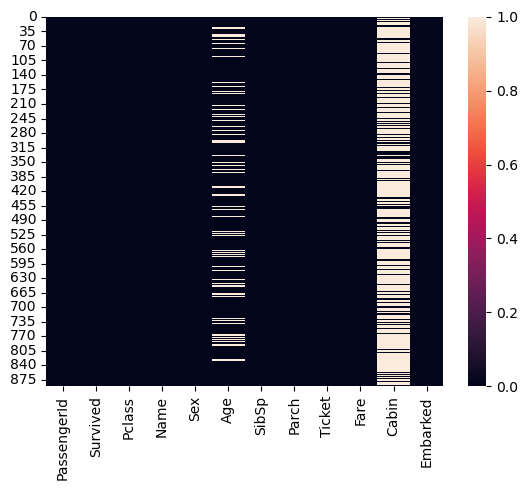

In [11]:
sns.heatmap(train_data.isnull())
# Age, Cabin, Embark contains null values that needs to be resolved

#### Fixing/Filling missing values
#### Finding the % of null values 
#### if %null values < 30, we can fill them

In [12]:
# Cabin
(train_data['Cabin'].isnull().sum()/len(train_data['Cabin']))*100

77.10437710437711

In [13]:
train_data.drop(columns='Cabin',inplace=True)
test_data.drop(columns='Cabin',inplace=True)

In [14]:
# Age
(train_data['Age'].isnull().sum()/len(train_data['Age']))*100

19.865319865319865

In [15]:
#Fill column
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)

In [16]:
train_data['Age'].isnull().sum()

0

In [17]:
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)

In [18]:
test_data['Age'].isnull().sum()

0

In [19]:
# Embarked
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
#Fill column
train_data['Embarked'].fillna('S',inplace=True)

In [21]:
train_data['Embarked'].isnull().sum()

0

In [22]:
#Fare
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)

In [23]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Plotting and Analysis

<Axes: xlabel='Survived', ylabel='count'>

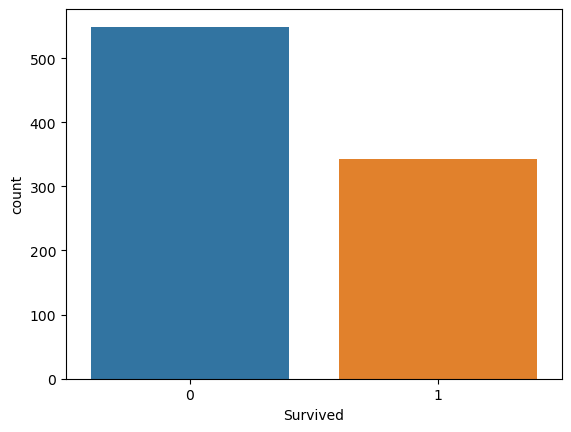

In [24]:
# survived vs not survived

sns.countplot(x='Survived',data=train_data)

<Axes: xlabel='Survived', ylabel='count'>

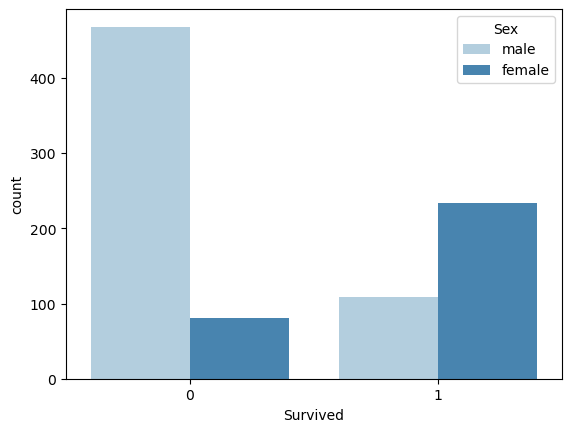

In [25]:
# Male vs Female Survived

sns.countplot(x='Survived',data=train_data,hue='Sex',palette='Blues')

<Axes: xlabel='Pclass', ylabel='count'>

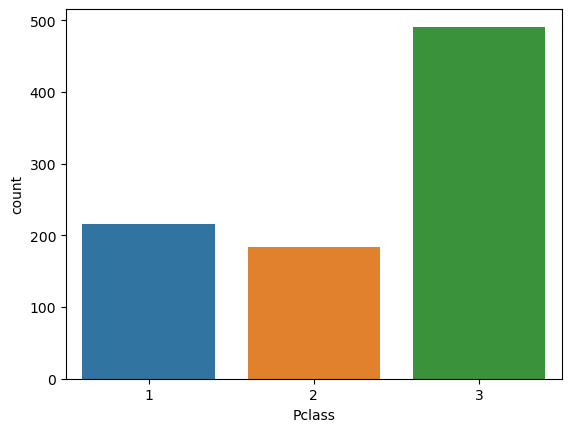

In [26]:
# Pclass 1 vs 2 vs 3

sns.countplot(x='Pclass',data=train_data)

Text(0.5, 1.0, 'Class Survivors')

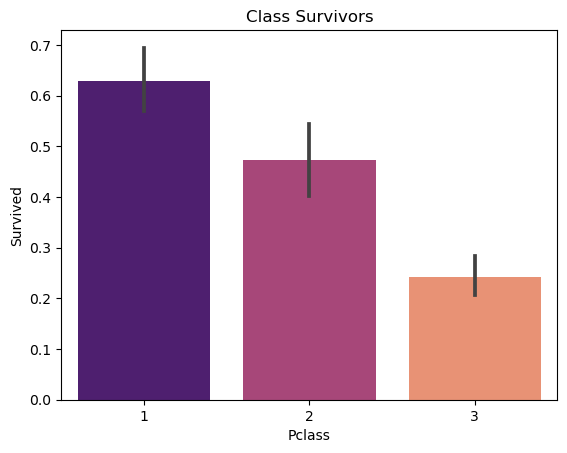

In [27]:
sns.barplot(x='Pclass',y='Survived',data=train_data,palette='magma')
plt.title('Class Survivors')

Text(0.5, 1.0, 'Gender Survivors')

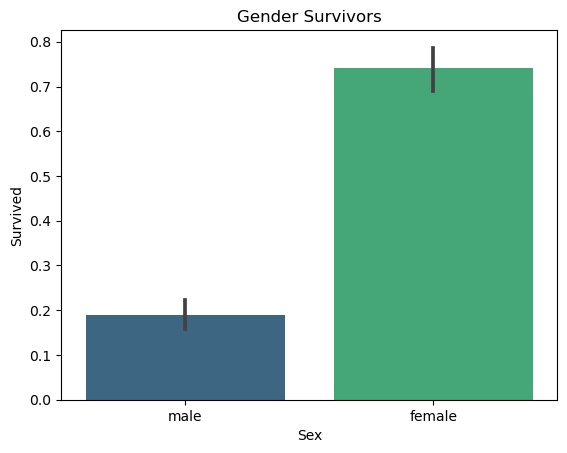

In [28]:
# Gender based Surviours

sns.barplot(x='Sex',y='Survived',data=train_data,palette='viridis')
plt.title('Gender Survivors')

C:\Users\taluk\AppData\Local\Temp\ipykernel_9136\3399401485.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),cmap="PiYG")


<Axes: >

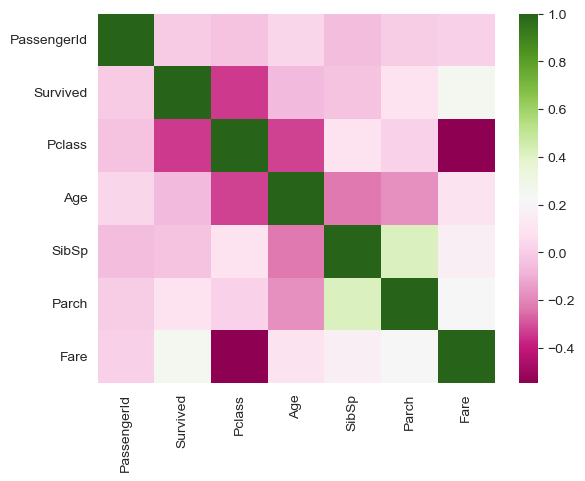

In [47]:
#Correlation
sns.heatmap(train_data.corr(),cmap="PiYG")

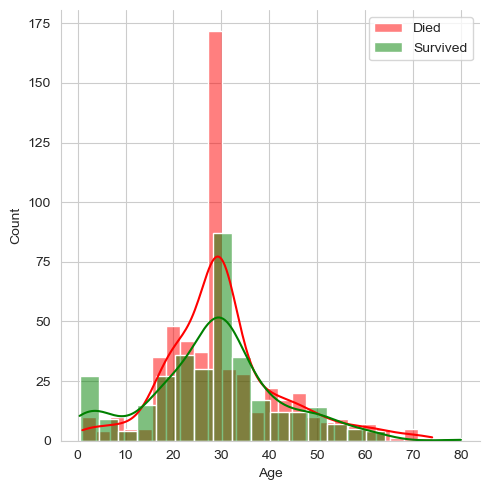

In [30]:
# Survival based on Age

sns.set_style('whitegrid')
sns.displot(train_data['Age'][train_data['Survived']==0],kde=True,label="Died",color='red')
sns.histplot(train_data['Age'][train_data['Survived']==1],kde=True, label="Survived",color='green')
plt.legend() 
plt.show()

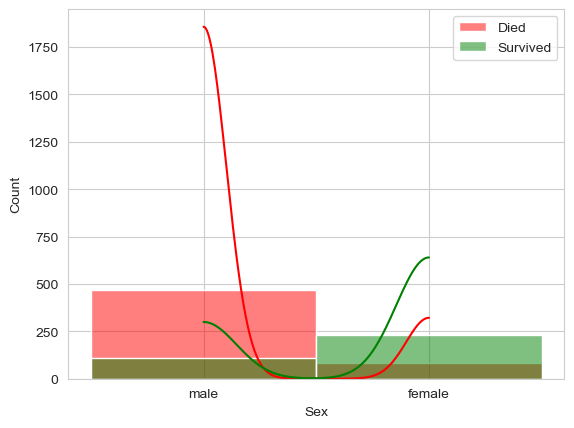

In [46]:
# Survival based on Gender

sns.set_style('whitegrid')
sns.histplot(train_data['Sex'][train_data['Survived']==0],kde=True,label="Died",color='red')
sns.histplot(train_data['Sex'][train_data['Survived']==1],kde=True, label="Survived",color='green')
plt.legend() 
plt.show()

### Preparing Data for Model

In [48]:
# We can see, Name, Sex, Ticket and Embarked are non-numerical.
# It seems Name, SibSp, Parch and Ticket number 
# Are not useful for Machine Learning Prediction hence we will drop it.

train_data.drop(['Name','SibSp','Parch','Ticket'],axis=1,inplace=True)

In [49]:
pID=test_data['PassengerId'].values

In [50]:
train_data.drop(['PassengerId'],axis=1,inplace=True)

In [51]:
test_data.drop(['Name','SibSp','Parch','PassengerId','Ticket'],axis=1,inplace=True)

In [52]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   Fare      418 non-null    float64
 4   Embarked  418 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 16.5+ KB


In [53]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [54]:
train=pd.get_dummies(train_data,columns=['Pclass','Sex','Embarked'],drop_first=True)

In [55]:
train

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.000000,7.2500,0,1,1,0,1
1,1,38.000000,71.2833,0,0,0,0,0
2,1,26.000000,7.9250,0,1,0,0,1
3,1,35.000000,53.1000,0,0,0,0,1
4,0,35.000000,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,1,0,1,0,1
887,1,19.000000,30.0000,0,0,0,0,1
888,0,29.699118,23.4500,0,1,0,0,1
889,1,26.000000,30.0000,0,0,1,0,0


In [56]:
test=pd.get_dummies(test_data,columns=['Pclass','Sex','Embarked'],drop_first=True)

In [57]:
test

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.50000,7.8292,0,1,1,1,0
1,47.00000,7.0000,0,1,0,0,1
2,62.00000,9.6875,1,0,1,1,0
3,27.00000,8.6625,0,1,1,0,1
4,22.00000,12.2875,0,1,0,0,1
...,...,...,...,...,...,...,...
413,30.27259,8.0500,0,1,1,0,1
414,39.00000,108.9000,0,0,0,0,0
415,38.50000,7.2500,0,1,1,0,1
416,30.27259,8.0500,0,1,1,0,1


In [58]:
x=train.iloc[:,1:].values
y=train.iloc[:,0].values

### Data Modelling 

In [65]:
# spilliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [93]:
# Decision Tree Classifier
dtc=DecisionTreeClassifier(random_state = 1000,max_depth = 12,min_samples_leaf = 1)
dtc.fit(X_train,Y_train)
pred_dtc=dtc.predict(X_test)
acc_dtc = accuracy_score(pred_dtc, Y_test)
print("Accuracy: ",round(acc_dtc*100,2))

Accuracy:  79.89


In [90]:
# Random Tree Classifier
rf=RandomForestClassifier(max_depth =4,random_state = 0)
rf.fit(X_train,Y_train)
pred_rf=rf.predict(X_test)
acc_rf = accuracy_score(pred_rf, Y_test)
print("Accuracy: ",round(acc_rf*100,2))

Accuracy:  83.24


In [91]:
# Logistic Regression
logreg = LogisticRegression(max_iter=120)
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print("Accuracy: ",acc_log)

Accuracy:  79.78


In [95]:
# KNN
knn = KNeighborsClassifier() 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print("Accuracy: ",acc_knn)

Accuracy:  78.79


In [94]:
# SVM 
svm = SVC()
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
acc_svm = round(svm.score(X_train, Y_train) * 100, 2)
print("Accuracy: ",acc_svm)

Accuracy:  68.54


### Testing

In [96]:
x_final=test.iloc[:,:].values

In [97]:
y_final=clsfr.predict(x_final)

In [98]:
result=pd.DataFrame()

In [99]:
result['passengerId']=pID
result['survived']=y_final

In [100]:
result

,passengerId,survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [101]:
result.to_csv('Result.csv',index=False)

### Correlation Among Factors

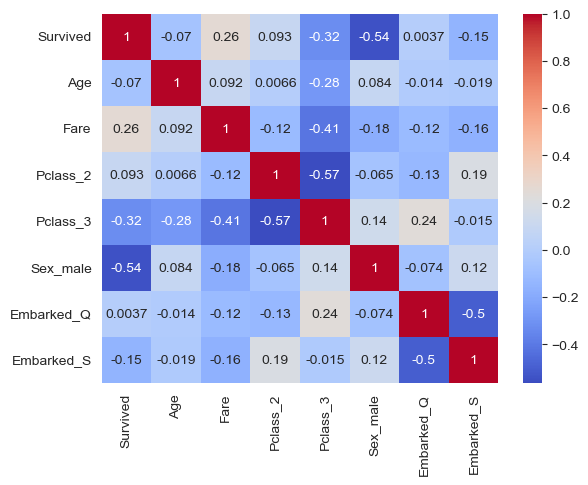

In [107]:
sns.heatmap(train.corr(),annot=True,cmap='coolwarm')
plt.show()

In [103]:
# Prediciting If I would Survive

# Age=20 Fare=9.8 Pclass_2=1 Pclass_3=0 Sex_male=0 Embarked_Q=0 Embarked_S=1
mine = [[20,9.8,1,0,0,0,1]]
pred = rf.predict(mine)
print(pred)

if pred == 0:
  print('You Died x_x')
else:
  print('You survived ;)')

[1]
You survived ;)


In [104]:
mine = [[16,30.8,0,1,1,0,1]]
pred = rf.predict(mine)
print(pred)

if pred == 0:
  print('You Died x_x')
else:
  print('You survived ;)')

[0]
You Died x_x
